# Simple Linear Regression

## 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

## 2. Load Data

In [2]:
data = pd.read_csv('1.01. Simple linear regression.csv')
data

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


In [3]:
data.dtypes

SAT      int64
GPA    float64
dtype: object

In [4]:
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


The task is to use linear regression to predict the GPA score based on the SAT score obtained.

## 3. Create a Regression 

### 3.1 Define the dependent and independent variables

y = b0 + b1x1

- Dependent variable (y) = GPA
- Independent variable (x) = SAT

In [5]:
y = data['GPA']
x1 = data['SAT']

### 3.2 Explore the data

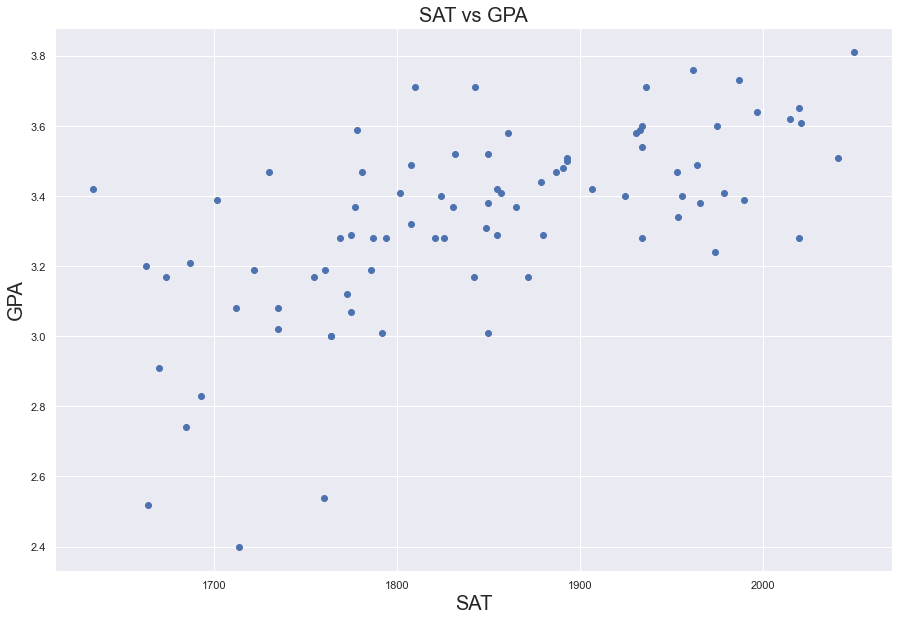

In [6]:
sns.set()
plt.figure(figsize=(15,10))
plt.scatter(x1, y)
plt.xlabel('SAT', fontsize=20)
plt.ylabel('GPA', fontsize=20)
plt.title('SAT vs GPA', fontsize=20)
plt.show()

Clearly a positive relationship

### 3.3 Regression

y = b0(1) + b1x1

In [7]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Thu, 05 May 2022   Prob (F-statistic):           7.20e-11
Time:                        14:37:32   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

yhat = b0 + b1x1
- coefficient constant = 0.2750. This means b0 = 0.2750
- coefficient SAT = 0.0017. This means b1 = 0.0017
- yhat = 0.0017*x1 + 0.275 OR GPA = 0.0017 * SAT + 0.275

- std err show the accuracy of prediction of each variable. The lower the std err, the better the prediction.

Table 1: 
- OLS (Ordinary Least Squares) Model is the most common method to estimate the linear regression method
- Least squares is the least squares error OR SSE. A lower error gives better explanatory power of the regression model
- R squared is a value between 0 and 1. 0 explains nothing of the variability data and 1 explains entire variability data. It is usually between 0.2 and 0.9. Good range is 0.7-0.99 for sciences but social sciences like economics 0.2 could be good.

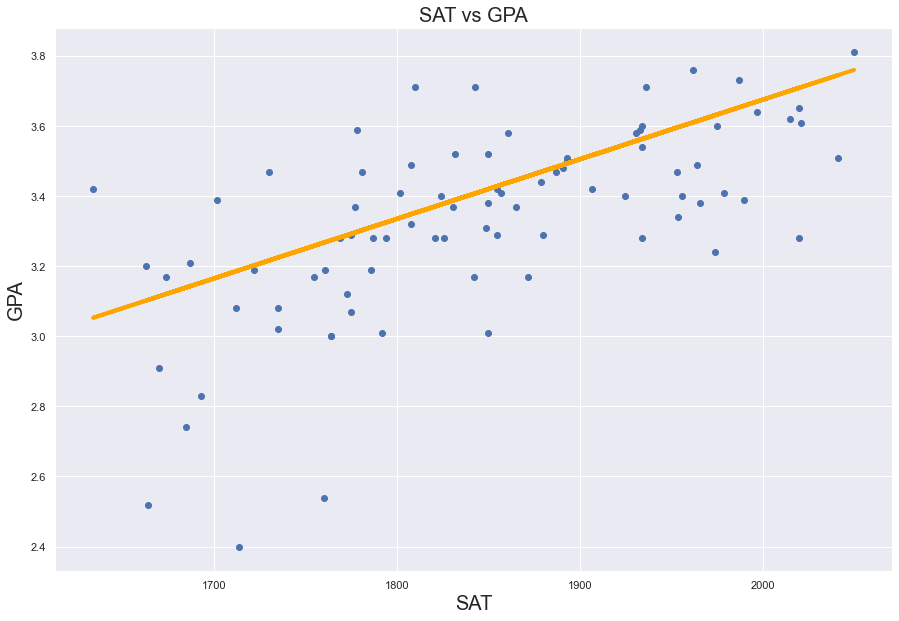

In [8]:
plt.figure(figsize=(15,10))
plt.scatter(x1,y)
yhat = 0.0017*x1 + 0.275
fig = plt.plot(x1,yhat, lw=4, c='Orange', label='Regression line')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('GPA', fontsize=20)
plt.title('SAT vs GPA', fontsize=20)
plt.show()

## 4. Multiple regression

yhat = b0 + b1x1 + b2x2 + ... + bnxn

- it is not about a line of best fit but rather the best fitting model i.e. least sum of square errors i.e. error
- as SSE goes down, SSR goes up. We want minimum SSE

In [9]:
data_2 = pd.read_csv('1.02. Multiple linear regression.csv')
data_2

,SAT,"Rand 1,2,3",GPA
0,1714,1,2.40
1,1664,3,2.52
2,1760,3,2.54
3,1685,3,2.74
4,1693,2,2.83
...,...,...,...
79,1936,3,3.71
80,1810,1,3.71
81,1987,3,3.73
82,1962,1,3.76


In [10]:
data_2.dtypes

SAT             int64
Rand 1,2,3      int64
GPA           float64
dtype: object

In [11]:
data_2.describe()

,SAT,"Rand 1,2,3",GPA
count,84.000000,84.000000,84.000000
mean,1845.273810,2.059524,3.330238
std,104.530661,0.855192,0.271617
min,1634.000000,1.000000,2.400000
25%,1772.000000,1.000000,3.190000
50%,1846.000000,2.000000,3.380000
75%,1934.000000,3.000000,3.502500
max,2050.000000,3.000000,3.810000


GPA = b0 + b1 * SAT + b2 (rand 1,2,3 )

In [12]:
y = data_2['GPA']
x1 = data_2[['SAT', 'Rand 1,2,3']]

In [13]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()

In [14]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     27.76
Date:                Thu, 05 May 2022   Prob (F-statistic):           6.58e-10
Time:                        14:37:32   Log-Likelihood:                 12.720
No. Observations:                  84   AIC:                            -19.44
Df Residuals:                      81   BIC:                            -12.15
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2960      0.417      0.710      0.480      -0.533       1.125
SAT            0.0017      0.000      7.432      0.000       0.001       0.002
Rand 1,2,3    -0.0083      0.027     -0.304      0.762      -0.062       0.046
==============================================================================
Omnibus:                       12.992   Durbin-Watson:                   0.948
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.364
Skew:                          -0.731   Prob(JB):                     0.000280
Kurtosis:                       4.594   Cond. No.                     3.33e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- R squared went up by .001 by adjusted R squared went down
- p value of Rand1,2,3 is very high of val 0.763 and we need it less than 0.05 therefore this column can be dropped

# Logistic Regression

## 1. Load Data

In [15]:
raw_data = pd.read_csv('2.01 Logistic Regression.csv')
raw_data

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No
...,...,...
163,1722,Yes
164,1750,Yes
165,1555,No
166,1524,No


In [16]:
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes':1, 'No':0})
data

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0
...,...,...
163,1722,1
164,1750,1
165,1555,0
166,1524,0


## 2. Variables

In [17]:
y = data['Admitted']
x1 = data['SAT']

## 3. Plot

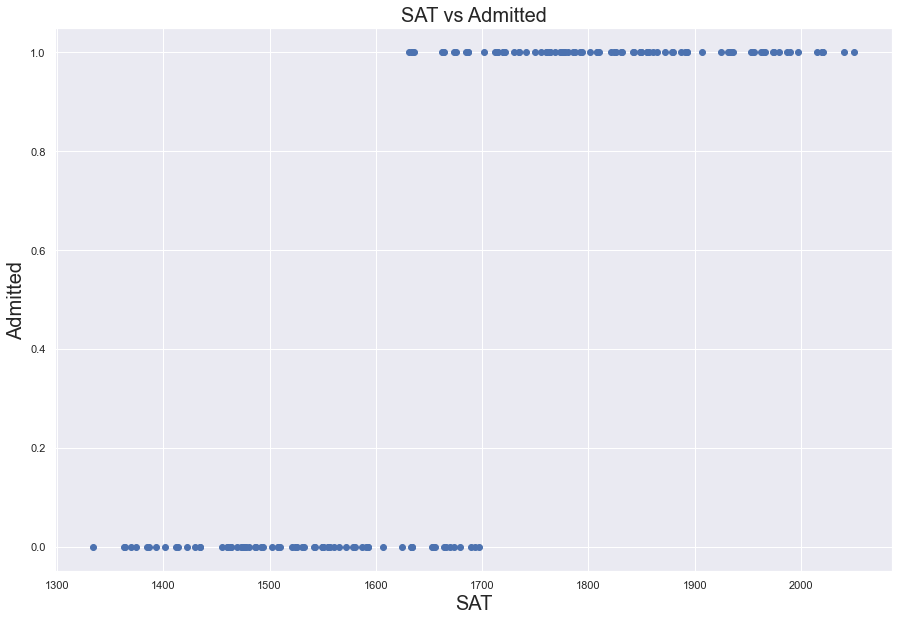

In [18]:
plt.figure(figsize=(15,10))
plt.scatter(x1, y, color='C0')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('Admitted', fontsize=20)
plt.title('SAT vs Admitted', fontsize=20)
plt.show()

### 3.2 Plot with logistic regression curve

In [19]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Thu, 05 May 2022   Pseudo R-squ.:                  0.7992
Time:                        14:37:32   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [20]:
def f(x,b0,b1):
    return np.array(np.exp(b0+x*b1)/(1+np.exp(b0+x*b1)))

f_sorted = np.sort(f(x1,results_log.params[0], results_log.params[1]))
x_sorted = np.sort(np.array(x1))

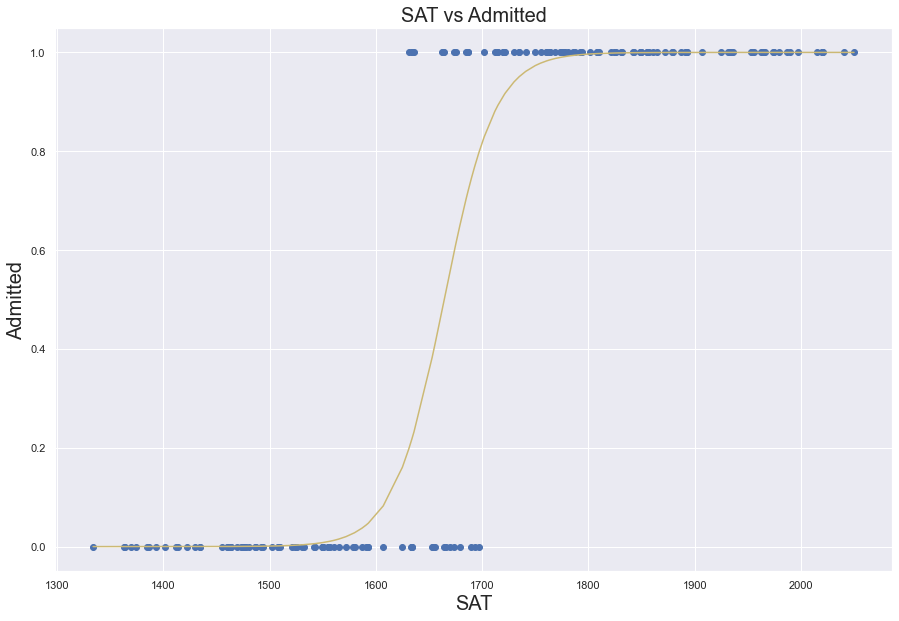

In [21]:
plt.figure(figsize=(15,10))
plt.scatter(x1,y,color = 'C0')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('Admitted', fontsize=20)
plt.title('SAT vs Admitted', fontsize=20)
plt.plot(x_sorted, f_sorted, color='C8')
plt.show()

Maximum Likelihood Explanation (MLE): describes the likelihood that the model describes the real underlying relationship of the variables. The bigger the likelihood function, the higher the chance the model is correct.

Log-likelihood is taken. The bigger it is the better and it is a lot of the times, negative

# Binary Predictors

## 1. Load Data

In [22]:
raw_data = pd.read_csv('2.02 Binary Predictors.csv')
raw_data

,SAT,Admitted,Gender
0,1363,No,Male
1,1792,Yes,Female
2,1954,Yes,Female
3,1653,No,Male
4,1593,No,Male
...,...,...,...
163,1722,Yes,Female
164,1750,Yes,Male
165,1555,No,Male
166,1524,No,Male


## 2. Variables

In [23]:
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes':1, 'No':0})
data['Gender'] = data['Gender'].map({'Female':1, 'Male':0})
data

,SAT,Admitted,Gender
0,1363,0,0
1,1792,1,1
2,1954,1,1
3,1653,0,0
4,1593,0,0
...,...,...,...
163,1722,1,1
164,1750,1,0
165,1555,0,0
166,1524,0,0


In [24]:
y = data['Admitted']
x1 = data[['SAT', 'Gender']]

## 3. Logistic Regression

In [25]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.120117
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      165
Method:                           MLE   Df Model:                            2
Date:                Thu, 05 May 2022   Pseudo R-squ.:                  0.8249
Time:                        14:37:32   Log-Likelihood:                -20.180
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.118e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -68.3489     16.454     -4.154      0.000    -100.598     -36.100
SAT            0.0406      0.010      4.129      0.000       0.021       0.060
Gender         1.9449      0.846      2.299      0.022       0.287       3.603
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [26]:
np.exp(1.9449)

6.992932526814459

Given the same SAT score, a female is 7 (6.99) times likely to be admitted than a male. 

## 4. Accuracy

In [27]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.02f}".format(x)})
results_log.predict()

array([0.00, 1.00, 1.00, 0.23, 0.02, 0.99, 1.00, 1.00, 1.00, 0.01, 1.00,
       1.00, 0.76, 0.00, 0.60, 1.00, 0.11, 0.12, 0.51, 1.00, 1.00, 1.00,
       0.00, 0.01, 0.97, 1.00, 0.48, 0.99, 1.00, 0.99, 0.00, 0.83, 0.25,
       1.00, 1.00, 1.00, 0.31, 1.00, 0.23, 0.00, 0.02, 0.45, 1.00, 0.00,
       0.99, 0.00, 0.99, 0.00, 0.00, 0.01, 0.00, 1.00, 0.92, 0.02, 1.00,
       0.00, 0.37, 0.98, 0.12, 1.00, 0.00, 0.78, 1.00, 1.00, 0.98, 0.00,
       0.00, 0.00, 1.00, 0.00, 0.78, 0.12, 0.00, 0.99, 1.00, 1.00, 0.00,
       0.30, 1.00, 1.00, 0.00, 1.00, 1.00, 0.85, 1.00, 1.00, 0.00, 1.00,
       1.00, 0.89, 0.83, 0.00, 0.98, 0.97, 0.00, 1.00, 1.00, 0.03, 0.99,
       0.96, 1.00, 0.00, 1.00, 0.01, 0.01, 1.00, 1.00, 1.00, 0.00, 0.00,
       0.02, 0.33, 0.00, 1.00, 0.09, 0.00, 0.97, 0.00, 0.75, 1.00, 1.00,
       0.01, 0.01, 0.00, 1.00, 0.00, 0.99, 0.57, 0.54, 0.87, 0.83, 0.00,
       1.00, 0.00, 0.00, 0.00, 1.00, 0.04, 0.00, 0.01, 1.00, 0.99, 0.52,
       1.00, 1.00, 0.05, 0.00, 0.00, 0.00, 0.68, 1.

- Predicted values by the model

Values below 0.5 means there is less than 50% chance of being admitted therefore it is rounded down. Alternatively, values above 0.5 will be rounded up.

In [28]:
np.array(data['Admitted'])

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0], dtype=int64)

- Actual values 

In [29]:
results_log.pred_table()

array([[69.00, 5.00],
       [4.00, 90.00]])

In [30]:
cm_df = pd.DataFrame(results_log.pred_table())
cm_df.columns = ['Predicted 0', 'Predicted 1']
cm_df = cm_df.rename(index={0: 'Actual 0', 1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,69.0,5.0
Actual 1,4.0,90.0


Confusion matrix. For 69 observations, the model predicted 0 when the true value was 0. For 90 observations, the model predicted 1 when it was actually 1.

In 4 cases the regression predicted 0 while the value was 1 and in 5 cases vice versa.

In [31]:
accuracy = ((69 + 90)/(69 +90+4+5))*100
accuracy

94.64285714285714

In [32]:
cm = np.array(cm_df)
accuracy_train = (cm[0,0]+cm[1,1])/cm.sum()
accuracy_train

0.9464285714285714

# Testing a model and assessing its accuracy

In [33]:
test = pd.read_csv('2.03 Test data.csv')
test

,SAT,Admitted,Gender
0,1323,No,Male
1,1725,Yes,Female
2,1762,Yes,Female
3,1777,Yes,Male
4,1665,No,Male
5,1556,Yes,Female
6,1731,Yes,Female
7,1809,Yes,Female
8,1930,Yes,Female
9,1708,Yes,Male


This dataset is similar to the previous one, but it was split to test on this data and train on the other data. 90-10 split.

In [34]:
test['Admitted'] = test['Admitted'].map({'Yes':1, 'No':0})
test['Gender'] = test['Gender'].map({'Female':1, 'Male':0})
test

,SAT,Admitted,Gender
0,1323,0,0
1,1725,1,1
2,1762,1,1
3,1777,1,0
4,1665,0,0
5,1556,1,1
6,1731,1,1
7,1809,1,1
8,1930,1,1
9,1708,1,0


Use the model to make predictions based on the test data and compare it with the actual outcome

In [35]:
x

,const,SAT,Gender
0,1.0,1363,0
1,1.0,1792,1
2,1.0,1954,1
3,1.0,1653,0
4,1.0,1593,0
...,...,...,...
163,1.0,1722,1
164,1.0,1750,0
165,1.0,1555,0
166,1.0,1524,0


In [36]:
test_actual = test['Admitted']
test_data = test.drop(['Admitted'], axis=1)
test_data = sm.add_constant(test_data)
test_data

,const,SAT,Gender
0,1.0,1323,0
1,1.0,1725,1
2,1.0,1762,1
3,1.0,1777,0
4,1.0,1665,0
5,1.0,1556,1
6,1.0,1731,1
7,1.0,1809,1
8,1.0,1930,1
9,1.0,1708,0


In [37]:
# create confusion matrix
def confusion_matrix(data,actual_values,model):
    pred_values = model.predict(data)
    bins=np.array([0,0.5,1])
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    return cm, accuracy

In [38]:
cm = confusion_matrix(test_data, test_actual, results_log)
cm

(array([[5.00, 1.00],
        [1.00, 12.00]]),
 0.8947368421052632)

# Clustering basics

## K-means

1) Choose the number of clusters you want to have

2) Specify the cluster seeds

3) Assign each point on the graph to a seed by proximity

4) Adjust the centroids

(repeat step 3-4 for each point)

In [39]:
from sklearn.cluster import KMeans

## 1. Load Data

In [40]:
data = pd.read_csv('3.01 country clusters.csv')
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


## 2. Plot Data

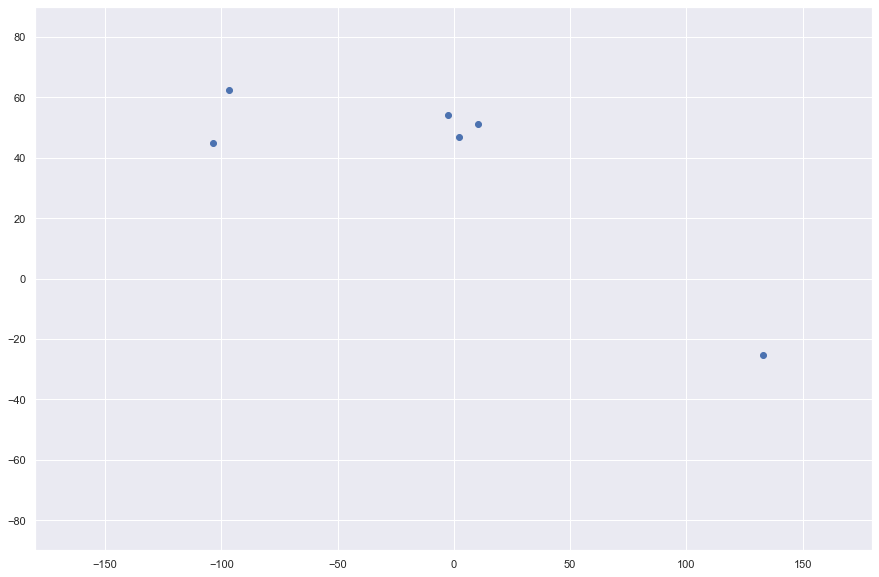

In [41]:
plt.figure(figsize=(15,10))
plt.scatter(data['Longitude'], data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

## 3. Select features

In [42]:
x = data.iloc[:, 1:3]
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


## 4. Clustering k-means

In [43]:
# k means with a cluser of 2
kmeans = KMeans(2)

In [44]:
kmeans.fit(x)

KMeans(n_clusters=2)

## 5. Clustering results

In [45]:
identified_cluster = kmeans.fit_predict(x)
identified_cluster

array([1, 1, 1, 1, 1, 0])

In [46]:
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = identified_cluster
data_with_clusters

,Country,Latitude,Longitude,Language,Clusters
0,USA,44.97,-103.77,English,1
1,Canada,62.40,-96.80,English,1
2,France,46.75,2.40,French,1
3,UK,54.01,-2.53,English,1
4,Germany,51.15,10.40,German,1
5,Australia,-25.45,133.11,English,0


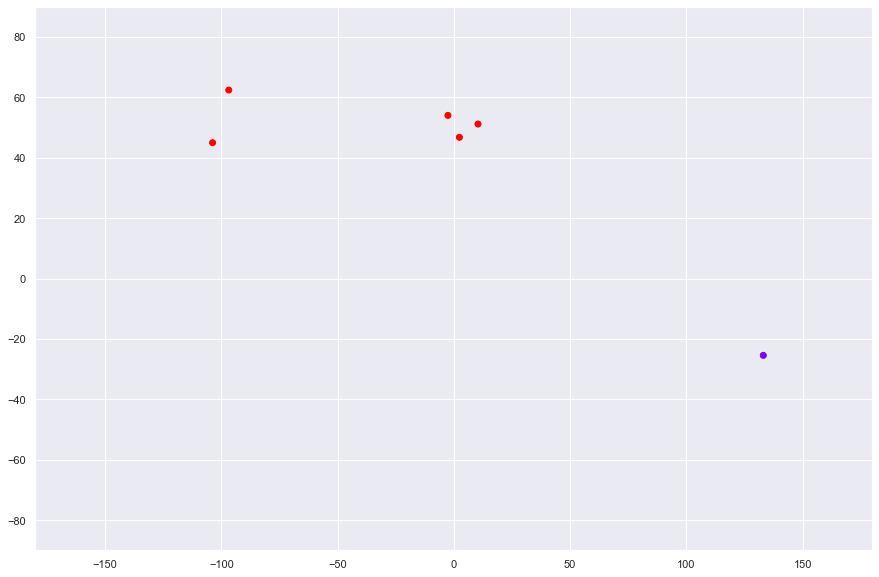

In [47]:
plt.figure(figsize=(15,10))
plt.scatter(data['Longitude'], data['Latitude'], c=data_with_clusters['Clusters'], cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

## Map the data

## 1. Select features

In [48]:
data_mapped = data.copy()
data_mapped['Language'] = data_mapped['Language'].map({'English':0, 'French':1, 'German':2})
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


In [49]:
x = data_mapped.iloc[:, 3:4]
x

,Language
0,0
1,0
2,1
3,0
4,2
5,0


In [50]:
data_with_clusters = data_mapped.copy()
data_with_clusters['Clusters'] = identified_cluster
data_with_clusters

,Country,Latitude,Longitude,Language,Clusters
0,USA,44.97,-103.77,0,1
1,Canada,62.40,-96.80,0,1
2,France,46.75,2.40,1,1
3,UK,54.01,-2.53,0,1
4,Germany,51.15,10.40,2,1
5,Australia,-25.45,133.11,0,0


## 2. Clustering

In [51]:
# k means with a cluser of 2
kmeans = KMeans(2)

In [52]:
kmeans.fit(x)

KMeans(n_clusters=2)

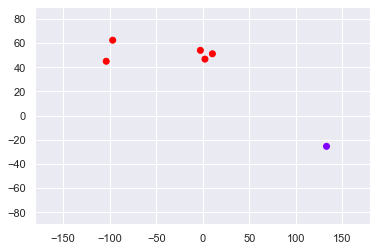

In [53]:
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c=data_with_clusters['Clusters'], cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

You can use the WCSS to determine the number of clusters you need or the optimal

## Selecting the WCSS

### WCSS

In [54]:
kmeans.inertia_

0.5

In [55]:
wcss = []
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
wcss

C:\Users\Abdulkadir\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
<ipython-input-55-e92a206caa93>:4: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  kmeans.fit(x)
<ipython-input-55-e92a206caa93>:4: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  kmeans.fit(x)
<ipython-input-55-e92a206caa93>:4: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  kmeans.fit(x)


In [56]:
wcss

[3.5, 0.5, 0.0, 0.0, 0.0, 0.0]

## Clustering

## The Elbow Method

Text(0, 0.5, 'Within-Clusters Sum of Squares')

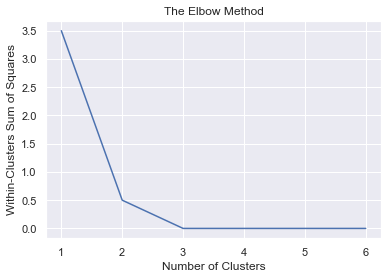

In [57]:
number_clusters = range(1,7)
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Clusters Sum of Squares')

Three cluster is the optimal solution as after that there is no gain.

# Cluster Example 2

## 1. Load Data

In [58]:
data = pd.read_csv('3.12. Example.csv')
data

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


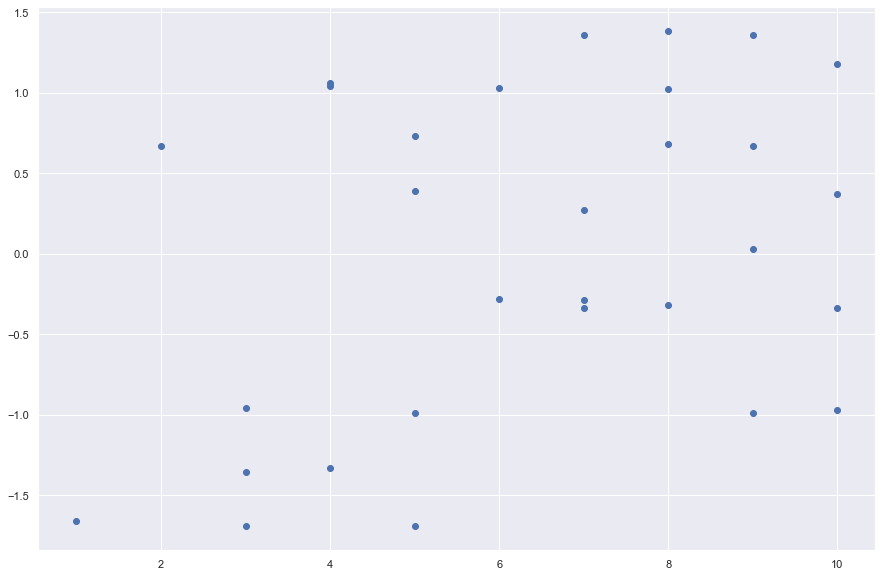

In [59]:
plt.figure(figsize=(15,10))
plt.scatter(data['Satisfaction'], data['Loyalty'])
plt.show()

In [60]:
x = data.copy()

In [63]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(n_clusters=2)

In [65]:
clusters = x.copy()
clusters['cluster_pred'] = kmeans.fit_predict(x)

Text(0, 0.5, 'Loyalty')

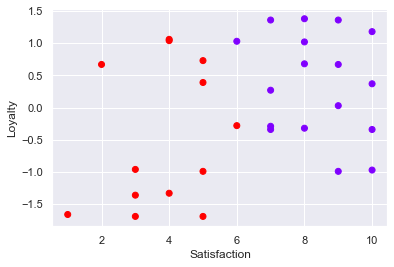

In [66]:
plt.scatter(clusters['Satisfaction'], clusters['Loyalty'], c=clusters['cluster_pred'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

## 2. Standardise the Variables

In [68]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)
x_scaled

array([[-0.93, -1.33],
       [-0.16, -0.28],
       [-0.54, -0.99],
       [0.23, -0.29],
       [-0.93, 1.06],
       [-2.10, -1.66],
       [1.40, -0.97],
       [0.62, -0.32],
       [0.62, 1.02],
       [0.62, 0.68],
       [1.40, -0.34],
       [-0.54, 0.39],
       [-0.54, -1.69],
       [-1.71, 0.67],
       [0.23, 0.27],
       [1.01, 1.36],
       [0.62, 1.38],
       [0.23, 1.36],
       [0.23, -0.34],
       [1.01, 0.67],
       [1.40, 1.18],
       [-1.32, -1.69],
       [-0.93, 1.04],
       [-1.32, -0.96],
       [-0.16, 1.03],
       [1.01, -0.99],
       [1.40, 0.37],
       [1.01, 0.03],
       [-1.32, -1.36],
       [-0.54, 0.73]])

scales each variable separately

In [71]:
wcss = []
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
wcss

C:\Users\Abdulkadir\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[59.999999999999986,
 29.818973034723143,
 17.913349527387968,
 10.247181805928422,
 7.792695153937187,
 6.571285077136385,
 5.326631124753926,
 4.380320178840312,
 3.828560739441652]

Text(0, 0.5, 'wcss')

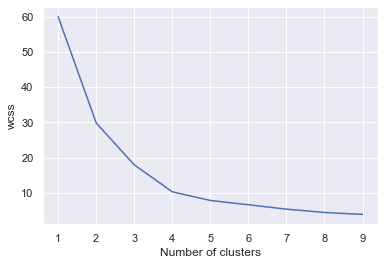

In [72]:
plt.plot(range(1,10), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('wcss')

## 3. Exploring solutions

In [78]:
kmeans_new = KMeans(4)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)
clusters_new

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,0
1,6,-0.28,1
2,5,-0.99,0
3,7,-0.29,1
4,4,1.06,2
5,1,-1.66,0
6,10,-0.97,1
7,8,-0.32,1
8,8,1.02,3
9,8,0.68,3


Text(0, 0.5, 'Loyalty')

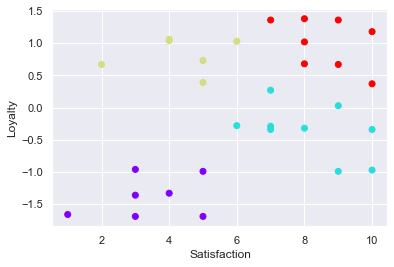

In [79]:
plt.scatter(clusters_new['Satisfaction'], clusters_new['Loyalty'], c=clusters_new['cluster_pred'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')